## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Import required modules for data understanding an graphing

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [149]:
!ls data

Aviation_Data.csv


In [150]:
aviation_df = pd.read_csv('data/Aviation_Data.csv',
                         parse_dates = ['Event.Date'])

C:\Users\rchag\AppData\Local\Temp\ipykernel_26520\4060357604.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('data/Aviation_Data.csv',


Taking a first look at the data, wanted to see all the columns

In [151]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [152]:
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [153]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [154]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Remove the 'Amateur.Built' planes as they are most likely not the safest or the most cost effective

In [155]:
aviation_df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [156]:
aviation_df['Amateur.Built'] = aviation_df['Amateur.Built'].apply(lambda x: None if x == 'Yes' else x)
aviation_df.dropna(subset = 'Amateur.Built', inplace = True)

Added a make_and_model column to better categorize the planes

In [157]:
aviation_df['Make'] = aviation_df['Make'].str.title()

In [158]:
aviation_df['make_and_model'] = aviation_df['Make'].str.title() + ' ' + aviation_df['Model'].str.title() 

Let's also filter the date from after 1980 as it looks like data before then is sparse

In [161]:
aviation_df['year'] = aviation_df['Event.Date'].dt.year

In [162]:
aviation_df = aviation_df.loc[aviation_df['year'] >= 1980]

In [163]:
aviation_df['Air.carrier'].value_counts().head(10)

Pilot                      198
American Airlines           89
United Airlines             88
Delta Air Lines             53
SOUTHWEST AIRLINES CO       42
DELTA AIR LINES INC         37
AMERICAN AIRLINES INC       29
Continental Airlines        27
Ryanair                     25
American Airlines, Inc.     25
Name: Air.carrier, dtype: int64

In [164]:
private_df = aviation_df.dropna(subset = 'Air.carrier')
private_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model,year
22,20020917X01657,Accident,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,NaN,NaN,PDK,NaN,Non-Fatal,Substantial,Helicopter,N5745Y,Bell,206L-1,No,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,NSCH,Unknown,"Rocky Mountain Helicopters, In",0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,02-01-1983,Bell 206L-1,1982
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N1956H,Piper,PA-34-200T,No,2.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Lang Air Service,2.0,0.0,0.0,0.0,VMC,Cruise,Probable Cause,04-01-1983,Piper Pa-34-200T,1982
39,20020917X01906,Accident,DCA82AA009,1982-01-05,"ITHACA, NY",United States,NaN,NaN,NaN,TOMPKINS COUNTY,Fatal(2),Destroyed,Airplane,N546BA,Piper,PA-31,No,2.0,Reciprocating,Part 135: Air Taxi & Commuter,SCHD,Unknown,Empire Airlines,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,05-01-1983,Piper Pa-31,1982
43,20020917X02156,Accident,LAX82DA037,1982-01-05,"SPRINGERVILLE, AZ",United States,NaN,NaN,Q35,SPRINGERVILLE,Non-Fatal,Substantial,Airplane,N738XP,Cessna,TR182,No,1.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Joel Frederick's Monarch Air,0.0,0.0,0.0,1.0,VMC,Taxi,Probable Cause,05-01-1983,Cessna Tr182,1982
44,20020917X01651,Accident,ANC82FA012,1982-01-05,"BETHEL, AK",United States,NaN,NaN,BET,BETHEL,Non-Fatal,Substantial,Airplane,N3343S,Cessna,A185F,No,1.0,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Executive Charter Service,0.0,2.0,0.0,0.0,VMC,Takeoff,Probable Cause,05-01-1983,Cessna A185F,1982


In [134]:
personal_df = aviation_df[aviation_df['Purpose.of.flight'] == 'Personal']
top_100_personal = personal_df['Make'].value_counts()[personal_df['Make'].value_counts()>= 100]
top_100_personal

Cessna                            15810
Piper                              9717
Beech                              3287
Mooney                             1102
Bellanca                            752
Aeronca                             526
Maule                               496
Champion                            407
Stinson                             393
Luscombe                            367
Taylorcraft                         332
Robinson                            318
Bell                                294
Boeing                              289
North American                      280
Schweizer                           278
Grumman                             250
Hughes                              196
Grumman American                    174
Cirrus Design Corp                  156
Aero Commander                      156
Ercoupe (Eng & Research Corp.)      137
Schleicher                          128
Lake                                122
Aviat                               112


In [135]:
personal_df = personal_df[personal_df['Make'].isin(list(top_100_personal.index))]

In [136]:
personal_df[personal_df['Aircraft.damage'] == 'Minor']['Make'].value_counts()

Cessna                129
Piper                  63
Beech                  32
Mooney                 21
North American         12
Boeing                 10
Stinson                 5
Bellanca                5
Cirrus Design Corp      5
Aeronca                 5
Schweizer               4
Grumman                 4
Waco                    3
Rockwell                2
Enstrom                 2
Grumman American        2
Champion                2
Taylorcraft             2
Schleicher              2
Maule                   1
Hughes                  1
Lake                    1
Bell                    1
Robinson                1
Aviat                   1
Name: Make, dtype: int64

<Axes: >

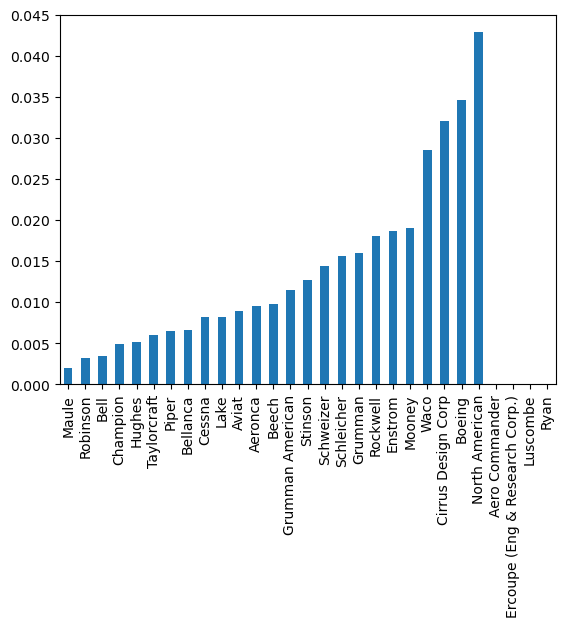

In [138]:
minor_personal = personal_df[personal_df['Aircraft.damage'] == 'Minor']['Make'].value_counts()
make_minor = minor_personal.div(personal_df['Make'].value_counts()).sort_values()

make_minor.plot(kind = 'bar')

In [184]:
#Cirrus Design Corp                0.032051
#Boeing                            0.034602
#North American                    0.042857
minor_personal.fillna(0,inplace = True)
minor_sub = (minor_personal.add(substantial_personal, fill_value x= 0)/personal_df['Make'].value_counts()).sort_values(ascending = False)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1092872715.py, line 5)

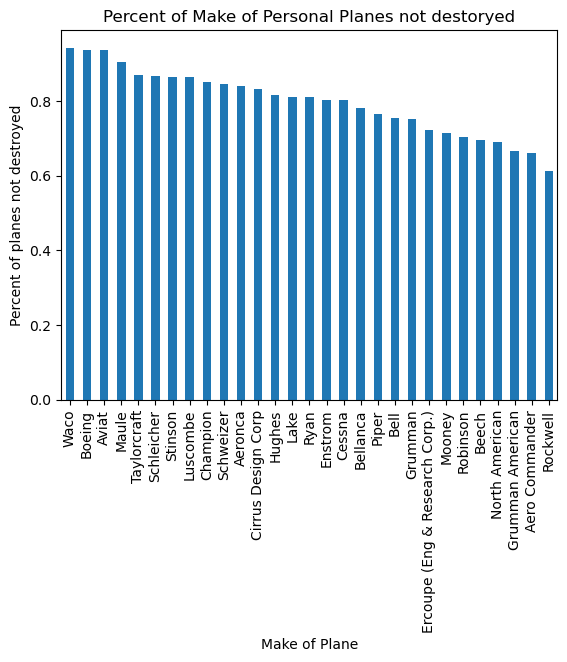

In [185]:
substantial_personal = personal_df[personal_df['Aircraft.damage'] == 'Substantial']['Make'].value_counts()
substantial_make = substantial_personal.div(personal_df['Make'].value_counts()).sort_values()
ax= minor_sub.plot(kind = 'bar')
ax.set_xlabel('Make of Plane')
ax.set_ylabel('Percent of planes not destroyed')
ax.set_title('Percent of Make of Personal Planes not destoryed');

In [81]:
list((substantial_make+ make_minor).dropna().sort_values()[-3:].index)

['Aviat', 'Boeing', 'Waco']

In [139]:
top_100_private = private_df['Make'].value_counts()[private_df['Make'].value_counts()>= 100]

In [140]:
private_df = private_df[private_df['Make'].isin(list(top_100_private.index))]

In [173]:
private_df.dropna(subset = 'Aircraft.damage', inplace = True)

In [174]:
minor_private = private_df[private_df['Aircraft.damage'] == 'Minor']['Make'].value_counts()
sub_private = private_df[private_df['Aircraft.damage'] == 'Substantial']['Make'].value_counts()
minor_sub_private = minor_private.add(sub_private, fill_na = 0)

In [175]:
minor_private.head()

Boeing               416
Cessna                95
Mcdonnell Douglas     77
Beech                 74
Piper                 52
Name: Make, dtype: int64

In [176]:
sub_private.head()

Cessna    3296
Piper     1702
Beech      629
Bell       480
Boeing     261
Name: Make, dtype: int64

In [183]:
minor_sub_private.div(private_df['Make'].value_counts())

Aerospatiale                   0.759690
Air Tractor                    0.813559
Air Tractor Inc                0.877660
Airbus                         0.878788
Beech                          0.823185
Bell                           0.777605
Boeing                         0.927397
Cessna                         0.883763
Cirrus Design Corp             0.887850
De Havilland                   0.830065
Douglas                        0.826667
Embraer                        0.810000
Eurocopter                     0.859375
Hughes                         0.901408
Mcdonnell Douglas              0.920732
Mooney                         0.922330
Piper                          0.873941
Robinson                            NaN
Robinson Helicopter            0.948276
Robinson Helicopter Company         NaN
Schweizer                      0.943548
Name: Make, dtype: float64

In [141]:
private_df[private_df['Make'] == 'Boeing']['make_and_model'].value_counts()

Boeing 737               322
Boeing 777                65
Boeing 767                51
Boeing 747                49
Boeing 757                41
Boeing 737-300            23
Boeing 727-200            20
Boeing 737-200            18
Boeing 727                17
Boeing 737 7H4            16
Boeing 787                15
Boeing 757-232            13
Boeing 737-222            13
Boeing 737-7H4            12
Boeing 737-800            12
Boeing 747-400            12
Boeing 727-223            11
Boeing 757-222            11
Boeing 737-400            11
Boeing 717-200            11
Boeing A75N1(Pt17)        10
Boeing 767-332            10
Boeing 737-322             9
Boeing 757-200             9
Boeing 757-223             9
Boeing 737-824             8
Boeing B75N1               8
Boeing 747-422             8
Boeing 737-8H4             8
Boeing A75N1               8
Boeing 727-227             7
Boeing 737-232             7
Boeing 727-224             7
Boeing 737-524             7
Boeing 727-225

In [169]:
aviation_df.fillna(value = {'Total.Serious.Injuries':0,'Total.Fatal.Injuries':0,'Total.Minor.Injuries':0}, inplace = True)

C:\Users\rchag\AppData\Local\Temp\ipykernel_26520\916213874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df.fillna(value = {'Total.Serious.Injuries':0,'Total.Fatal.Injuries':0,'Total.Minor.Injuries':0}, inplace = True)


In [171]:
aviation_df['total_injured'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries']
aviation_df.head()

C:\Users\rchag\AppData\Local\Temp\ipykernel_26520\2886435507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df['total_injured'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries']


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model,year,total_injured
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Cessna 180,1981,4.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Cessna 140,1982,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Cessna 401B,1982,0.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,North American Navion L-17B,1982,3.0
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N44832,Piper,PA-28-161,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,Piper Pa-28-161,1982,0.0


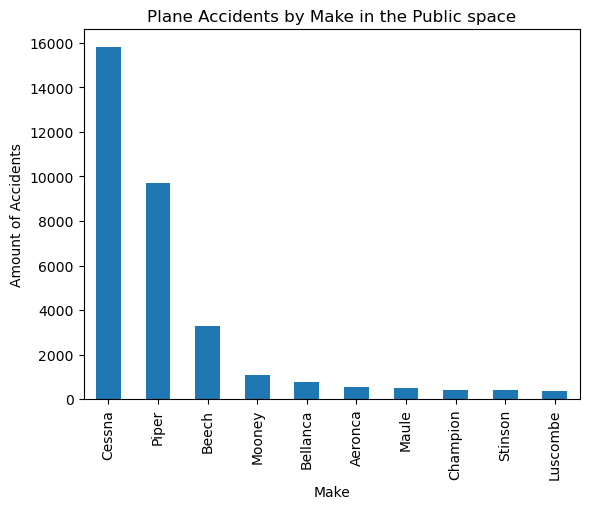

In [172]:
ax = personal_df['Make'].value_counts()[0:10].plot(kind = 'bar')
ax.set_xlabel('Make')
ax.set_ylabel('Amount of Accidents')
ax.set_title('Plane Accidents by Make in the Public space')
plt.savefig('Bar_make_accidents.png', dpi=1000);

Checking on the 'Weather.Condition' Category to see if there was any relationship between accidents and the weather

In [173]:
aviation_df = aviation_df.loc[aviation_df['year'] >= 1980]

Seems like taking out all the 'Amateur.built' planes removes planes that appear only a few times in the data

With a cleaner data set lets see if we can now find the lowest risk airplanes for the company
to find this lets compare the cost and potential profits of the top 10 most accident prone planes and bottom 10 most accident prone by make and model

In [174]:
aviation_df['total_injured'] = aviation_df['Total.Fatal.Injuries'] + aviation_df['Total.Serious.Injuries'] + aviation_df['Total.Minor.Injuries']
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,make_and_model,year,total_injured
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,Cessna 180,1981,4.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,Cessna 140,1982,0.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,Cessna 401B,1982,0.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,North American Navion L-17B,1982,3.0
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N44832,Piper,PA-28-161,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,Piper Pa-28-161,1982,0.0
